In [2]:
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
from catboost import CatBoostRegressor
from joblib.externals.loky import cpu_count
from lightgbm import LGBMRegressor
from mpmath.math2 import math_sqrt
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import cross_val_score, LearningCurveDisplay
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBRegressor

In [3]:
df = pd.read_parquet('../data/cleaned_data.parquet')

In [4]:
y_columns = ['numdocksavailable', 'numbikesavailable']
X_columns = df.columns.difference(y_columns + ['coordonnees_geo', 'duedate'])
X = df[X_columns]
y = df['numdocksavailable']

split_date = "2025-12-20"

# Features
X_train = df.loc[df["duedate"] < split_date, X_columns]
X_val = df.loc[df["duedate"] >= split_date, X_columns]

# Target
y_train = df.loc[df["duedate"] < split_date, y_columns]
y_val = df.loc[df["duedate"] >= split_date, y_columns]

In [5]:
categorical_features = X.select_dtypes(include=["object", "category"]).columns
numeric_features = X.select_dtypes(exclude=['object']).columns

numeric_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ("imputer", SimpleImputer(strategy="median"))
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("imputer", SimpleImputer(strategy="most_frequent"))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [18]:
catboost = CatBoostRegressor(loss_function='MultiRMSE', verbose=None)

xgb = MultiOutputRegressor(XGBRegressor(verbose=None))

lgbm = MultiOutputRegressor(LGBMRegressor(verbose=None))

random_forest = RandomForestRegressor(verbose=0)

models = {
    "CatBoost": catboost,
    "XGBoost": xgb,
    "LightGBM": lgbm,
    "RandomForest": random_forest
}

Result for CatBoost
0:	learn: 16.8308137	total: 234ms	remaining: 3m 53s
1:	learn: 16.4436575	total: 460ms	remaining: 3m 49s
2:	learn: 16.0567695	total: 709ms	remaining: 3m 55s
3:	learn: 15.6924856	total: 947ms	remaining: 3m 55s
4:	learn: 15.3405365	total: 1.39s	remaining: 4m 35s
5:	learn: 15.0005577	total: 1.63s	remaining: 4m 30s
6:	learn: 14.6475221	total: 2.03s	remaining: 4m 48s
7:	learn: 14.3132975	total: 2.34s	remaining: 4m 49s
8:	learn: 13.9953426	total: 2.51s	remaining: 4m 36s
9:	learn: 13.6944131	total: 2.86s	remaining: 4m 42s
10:	learn: 13.3958152	total: 3.62s	remaining: 5m 25s
11:	learn: 13.1100123	total: 3.97s	remaining: 5m 26s
0:	learn: 16.5310329	total: 421ms	remaining: 7m
12:	learn: 12.8185984	total: 4.6s	remaining: 5m 49s
0:	learn: 16.5192529	total: 410ms	remaining: 6m 49s
1:	learn: 16.1239997	total: 842ms	remaining: 7m
0:	learn: 16.5192529	total: 1.05s	remaining: 17m 30s
1:	learn: 16.1538744	total: 730ms	remaining: 6m 4s
13:	learn: 12.5333337	total: 5.13s	remaining: 6m 1

/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Result for LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 8894, number of used features: 13
[LightGBM] [Info] Start training from score 18.942546
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.183396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 8894, number of used features: 96
[LightGBM] [Info] Start training from score 19.814931
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.292236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if m

/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.508610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 28906, number of used features: 109
[LightGBM] [Info] Start training from score 19.454196
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 12.200458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9434
[LightGBM] [Info] Number of data points in the train set: 88944, number of used features: 4340
[LightGBM] [Info] Start training from score 19.060577
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 16.657262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.211159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 8894, number of used features: 96
[LightGBM] [Info] Start training from score 19.814931
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.484983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 28906, number of used features: 109
[LightGBM] [Info] Start training from score 19.454196
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 6.788392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9422
[LightGBM] [Info] Number of data points in the train set

/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 8.026185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9431
[LightGBM] [Info] Number of data points in the train set: 68931, number of used features: 4340
[LightGBM] [Info] Start training from score 19.046322
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 8.514797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9433
[LightGBM] [Info] Number of data points in the train set: 88944, number of used features: 4340
[LightGBM] [Info] Start training from score 18.958693


/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.507924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 28906, number of used features: 109
[LightGBM] [Info] Start training from score 11.588390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 4.390566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9434
[LightGBM] [Info] Number of data points in the train set: 88944, number of used features: 4340
[LightGBM] [Info] Start training from score 12.064097
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 8.269655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 8.326843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9431
[LightGBM] [Info] Number of data points in the train set: 68931, number of used features: 4340
[LightGBM] [Info] Start training from score 12.058696
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 4.477761 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9433
[LightGBM] [Info] Number of data points in the train set: 88944, number of used features: 4340
[LightGBM] [Info] Start training from score 12.133196
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 7.403411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] To

/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/vagno/Desktop/velib-paris/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid 

Result for RandomForest


KeyboardInterrupt: 

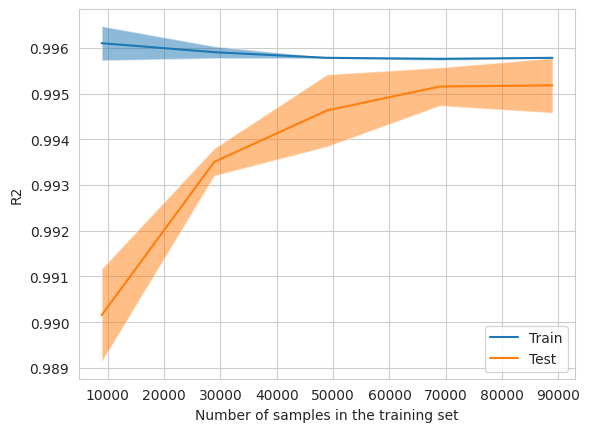

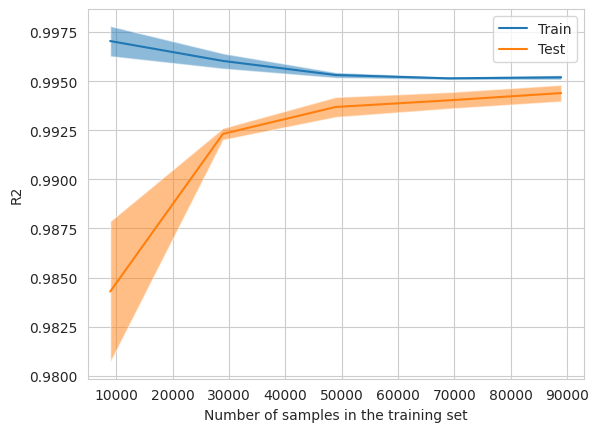

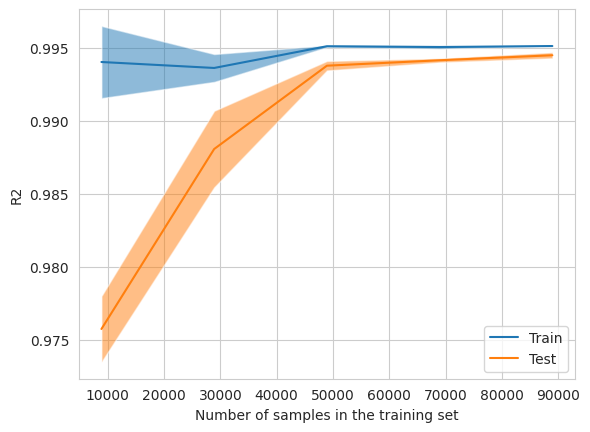

In [19]:
for key, model in models.items():
    print(f"Result for {key}")
    pipeline = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ]
    )
    LearningCurveDisplay.from_estimator(pipeline, X_train, y_train, cv=4, scoring='r2', random_state=42, verbose=0, n_jobs=cpu_count() - 1)

In [8]:
def objective(trial):
    hyper_params = {
       "n_estimators": trial.suggest_int("n_estimators", 300, 1500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 15),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1, 20, log=True),
        "tree_method": "hist",
        "random_state": 42
    }

    model = XGBRegressor(**hyper_params, device='gpu')
    pipeline = Pipeline(
        steps= [
            ('preprocessor', preprocessor),
            ('model', model)
        ]
    )
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    return r2_score(y_val, y_pred)

In [9]:
study = optuna.create_study()
study.optimize(objective, n_trials=50)

best_params = study.best_params

[I 2025-12-27 08:11:57,647] A new study created in memory with name: no-name-9432f8d6-165d-48fa-a769-e78dda6f17ee
[I 2025-12-27 08:12:52,448] Trial 0 finished with value: 0.9940544962882996 and parameters: {'n_estimators': 1054, 'learning_rate': 0.04689504216663535, 'max_depth': 7, 'subsample': 0.8151360920822879, 'colsample_bytree': 0.9743804832009244, 'min_child_weight': 15, 'gamma': 0.003596182185754415, 'reg_alpha': 3.204516316100878, 'reg_lambda': 1.0703330008570386}. Best is trial 0 with value: 0.9940544962882996.
[I 2025-12-27 08:13:06,356] Trial 1 finished with value: 0.9888029098510742 and parameters: {'n_estimators': 978, 'learning_rate': 0.02197329958126135, 'max_depth': 3, 'subsample': 0.8161225942339679, 'colsample_bytree': 0.8845848183171214, 'min_child_weight': 15, 'gamma': 2.8105994763263102, 'reg_alpha': 8.079195266664186, 'reg_lambda': 2.460537685345074}. Best is trial 1 with value: 0.9888029098510742.
[I 2025-12-27 08:13:57,027] Trial 2 finished with value: 0.9929109

R2 0.9719142913818359
MSE 3.741891860961914
RMSE 1.9343970277484182
MAE 1.2626465559005737


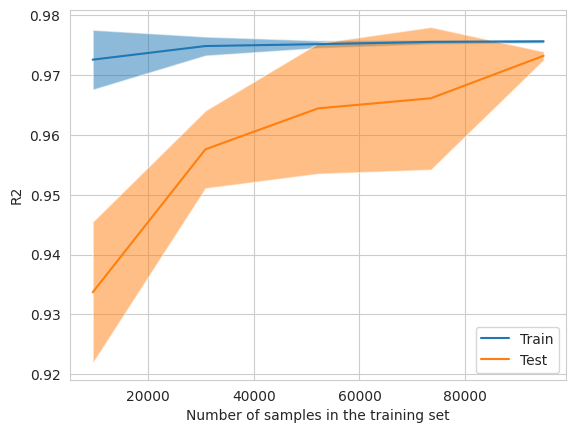

In [10]:
final_model = XGBRegressor(**best_params, device='gpu')

pipeline = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('model', final_model)
        ]
    )

pipeline.fit(X_train, y_train)

LearningCurveDisplay.from_estimator(pipeline, X_train, y_train, cv=5, scoring='r2', random_state=42, verbose=0)

pred = pipeline.predict(X_val)

print(f'R2 {r2_score(y_val, pred)}')
print(f'MSE {mean_squared_error(y_val, pred)}')
print(f'RMSE {math_sqrt(mean_squared_error(y_val, pred))}')
print(f'MAE {mean_absolute_error(y_val, pred)}')